In [626]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score, \
confusion_matrix, log_loss, roc_auc_score, roc_curve, classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

In [627]:
import sys
!{sys.executable} -m pip install xgboost

In [628]:
df = pd.read_excel("data.xls", header = 1)
df_eda= df.copy(deep = True)

In [608]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [629]:
#Categorizing Male/Female
df_eda.loc[df_eda['SEX'] == 2, 'SEX'] = 'Female'
df_eda.loc[df_eda['SEX'] == 1, 'SEX'] = 'Male'


In [630]:
#Categorizing Marriage 1:Married 2:Single 3:Other 
df_eda.loc[df_eda['MARRIAGE'] == 1, 'MARRIAGE'] = 'Married'
df_eda.loc[df_eda['MARRIAGE'] == 2, 'MARRIAGE'] = 'Single'
df_eda.loc[df_eda['MARRIAGE'] == 3, 'MARRIAGE'] = 'Other'
df_eda.loc[df_eda['MARRIAGE'] == 0, 'MARRIAGE'] = 'Other'  #Not a valid category, adding it in other category

In [631]:
#Categorizing Education 1:Graduate School 2:University 3:High School 4:Others
#5,6,0 not a valid category hence adding in other category (4)
df_eda.loc[df_eda['EDUCATION'] == 1, 'EDUCATION'] = 'Graduate School'
df_eda.loc[df_eda['EDUCATION'] == 2, 'EDUCATION'] = 'University'
df_eda.loc[df_eda['EDUCATION'] == 3, 'EDUCATION'] = 'High School'
df_eda.loc[df_eda['EDUCATION'] == 4 , 'EDUCATION'] = 'Other'
df_eda.loc[df_eda['EDUCATION'] == 5 , 'EDUCATION'] = 'Other'
df_eda.loc[df_eda['EDUCATION'] == 6 , 'EDUCATION'] = 'Other'
df_eda.loc[df_eda['EDUCATION'] == 0 , 'EDUCATION'] = 'Other'


In [632]:
# PAY_0 : -1 Paid Duly, 1: Payment delay of 1 month, 2: Payment delay of 2 mopnth etc
# PAY_0: -2,-1 all are put in the bucket of PAY_0 = 0

df_eda.loc[df_eda['PAY_0'] == -2, 'PAY_0'] = 0
df_eda.loc[df_eda['PAY_0'] == -1, 'PAY_0'] = 0

df_eda = df_eda.rename(columns={"PAY_0": "PAY_1"})

df_eda.loc[df_eda['PAY_2'] == -2, 'PAY_2'] = 0
df_eda.loc[df_eda['PAY_2'] == -1, 'PAY_2'] = 0

df_eda.loc[df_eda['PAY_3'] == -2, 'PAY_3'] = 0
df_eda.loc[df_eda['PAY_3'] == -1, 'PAY_3'] = 0

df_eda.loc[df_eda['PAY_4'] == -2, 'PAY_4'] = 0
df_eda.loc[df_eda['PAY_4'] == -1, 'PAY_4'] = 0

df_eda.loc[df_eda['PAY_5'] == -2, 'PAY_5'] = 0
df_eda.loc[df_eda['PAY_5'] == -1, 'PAY_5'] = 0

df_eda.loc[df_eda['PAY_6'] == -2, 'PAY_6'] = 0
df_eda.loc[df_eda['PAY_6'] == -1, 'PAY_6'] = 0

In [636]:
df_eda = df_eda.rename(columns={"default payment next month": "DEFAULT"})

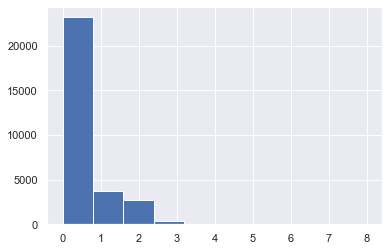

0    0.772733
1    0.122933
2    0.088900
3    0.010733
4    0.002533
5    0.000867
8    0.000633
6    0.000367
7    0.000300
Name: PAY_1, dtype: float64
0    0.852067
2    0.130900
3    0.010867
4    0.003300
1    0.000933
5    0.000833
7    0.000667
6    0.000400
8    0.000033
Name: PAY_2, dtype: float64
0    0.859567
2    0.127300
3    0.008000
4    0.002533
7    0.000900
6    0.000767
5    0.000700
1    0.000133
8    0.000100
Name: PAY_3, dtype: float64
0    0.883000
2    0.105300
3    0.006000
4    0.002300
7    0.001933
5    0.001167
6    0.000167
1    0.000067
8    0.000067
Name: PAY_4, dtype: float64
0    0.901067
2    0.087533
3    0.005933
4    0.002800
7    0.001933
5    0.000567
6    0.000133
8    0.000033
Name: PAY_5, dtype: float64
0    0.897367
2    0.092200
3    0.006133
4    0.001633
7    0.001533
6    0.000633
5    0.000433
8    0.000067
Name: PAY_6, dtype: float64
Female    0.603733
Male      0.396267
Name: SEX, dtype: float64
Single     0.532133
Married    0.455300


NameError: name 'T' is not defined

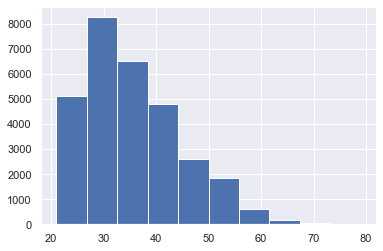

In [637]:
#EDA

# Payment of Last Payments: -1: Paid Duly, 1: Delay 1 month, 2: Delay 2 Months and so on
df_eda.PAY_1.hist()
plt.show()
print(df_eda.PAY_1.value_counts(normalize = True))
print(df_eda.PAY_2.value_counts(normalize = True))
print(df_eda.PAY_3.value_counts(normalize = True))
print(df_eda.PAY_4.value_counts(normalize = True))
print(df_eda.PAY_5.value_counts(normalize = True))
print(df_eda.PAY_6.value_counts(normalize = True))
## 0 and -2 category not mentioned in the data defination, but as 0 has a majority share of data, 
#so have put category -1 and -2 into 0 category

print(df_eda.SEX.value_counts(normalize = True))  # 60% Female, 40% Male

print(df_eda.MARRIAGE.value_counts(normalize = True)) # 0 is not a valid category hence putting it in others categpry (3)

print(df_eda.EDUCATION.value_counts(normalize = True))  #5,6,0 not a valid category hence adding in other category (4)

print(df_eda.AGE.hist())

#Making one more copy of Data Frame to be used for frature engineering
df_eda_features = df_eda.copy(deep = T)


<AxesSubplot:xlabel='SEX', ylabel='count'>

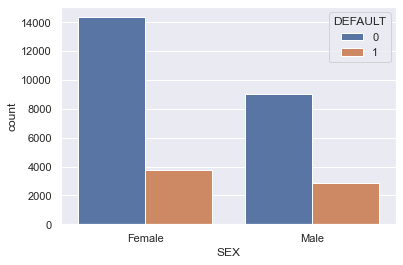

In [439]:
#% of Default Rate in Male vs Frmale
sns.countplot(x= "SEX", data = df_eda, hue ="DEFAULT")

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

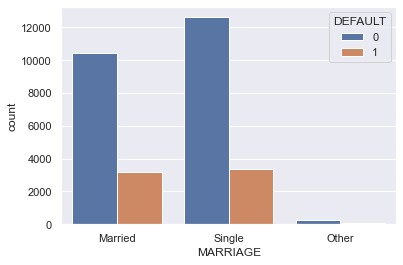

In [428]:
#% of Default Rate in Married vs Single
sns.countplot(x= "MARRIAGE", data = df_eda, hue ="DEFAULT")

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

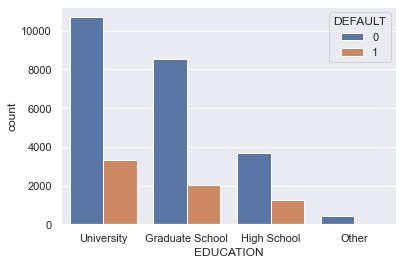

In [429]:
#% of Default Rate depending on Level of Education
sns.countplot(x= "EDUCATION", data = df_eda, hue ="DEFAULT")


In [638]:
# Imbalanced data set with 22.12% defaults
df_eda["DEFAULT"].value_counts(normalize = True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

In [440]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_1      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

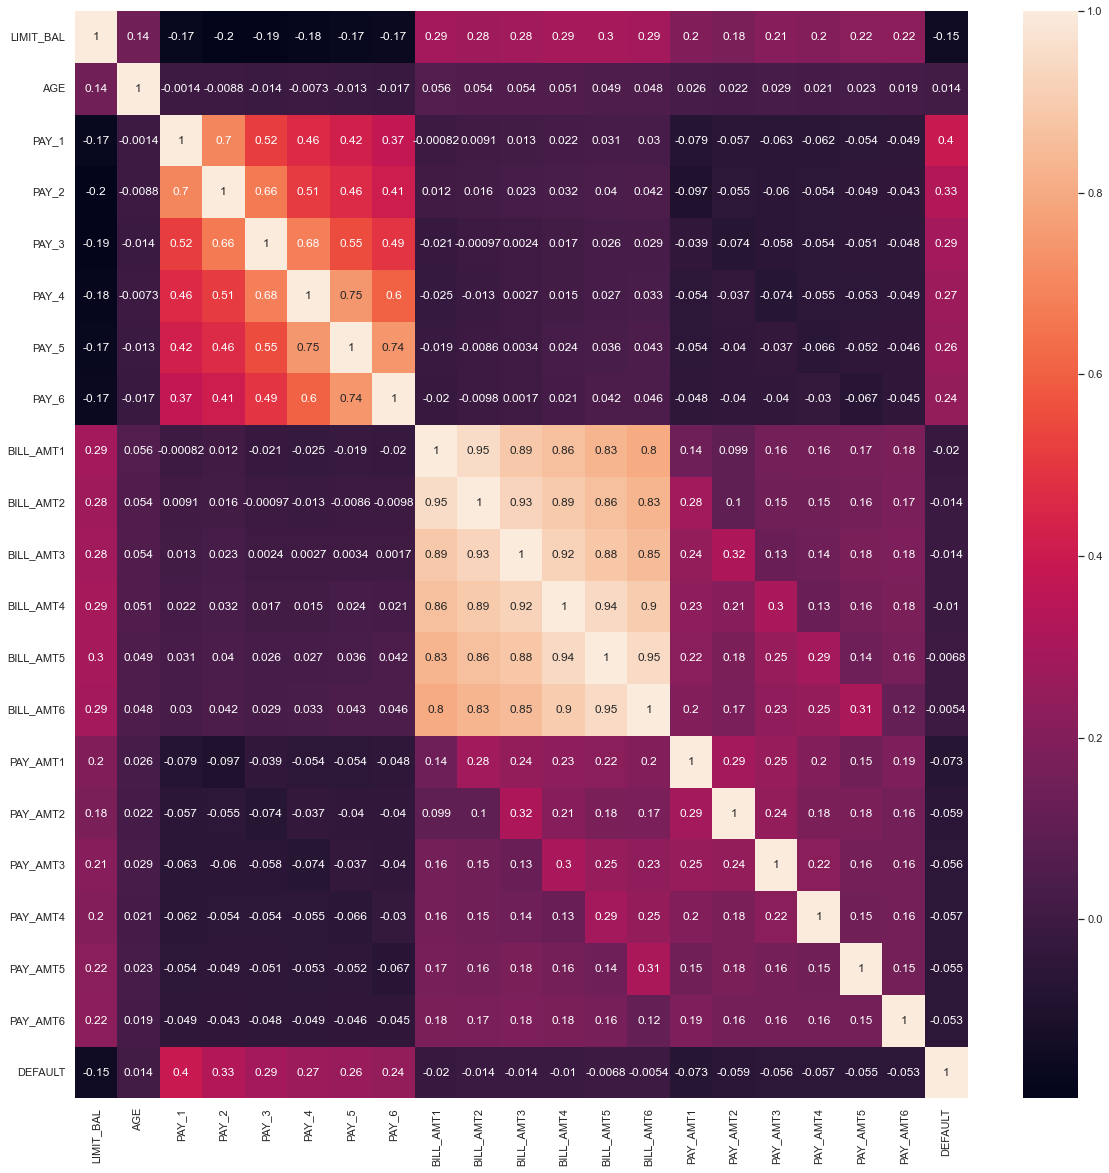

In [432]:
# Heat Plot showing correlation between different variables
#Correlation exists between chances of Default and the credit card payment in the last 6 months 
plt.subplots(figsize=(20,20))
ax = sns.heatmap(data = df_eda.iloc[:,1:25].corr(), annot= True, xticklabels = True, yticklabels = True)
ax.yaxis.label.set_size(20)

In [639]:
y= df_eda["DEFAULT"]
X= df_eda.drop(columns = ["DEFAULT","ID"])


In [640]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [641]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 22788 to 27126
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  24000 non-null  int64 
 1   SEX        24000 non-null  object
 2   EDUCATION  24000 non-null  object
 3   MARRIAGE   24000 non-null  object
 4   AGE        24000 non-null  int64 
 5   PAY_1      24000 non-null  int64 
 6   PAY_2      24000 non-null  int64 
 7   PAY_3      24000 non-null  int64 
 8   PAY_4      24000 non-null  int64 
 9   PAY_5      24000 non-null  int64 
 10  PAY_6      24000 non-null  int64 
 11  BILL_AMT1  24000 non-null  int64 
 12  BILL_AMT2  24000 non-null  int64 
 13  BILL_AMT3  24000 non-null  int64 
 14  BILL_AMT4  24000 non-null  int64 
 15  BILL_AMT5  24000 non-null  int64 
 16  BILL_AMT6  24000 non-null  int64 
 17  PAY_AMT1   24000 non-null  int64 
 18  PAY_AMT2   24000 non-null  int64 
 19  PAY_AMT3   24000 non-null  int64 
 20  PAY_AMT4   24000 non-nul

In [443]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_1      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [444]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
22788,160000,Female,University,Single,33,2,2,3,2,0,...,168541,164310,162681,163005,15000,0,0,6100,12300,6100
29006,150000,Female,Graduate School,Single,34,1,0,0,0,0,...,0,0,0,0,53,0,0,0,0,0
16950,10000,Male,University,Married,50,1,2,0,0,0,...,8446,8067,8227,8400,2,1281,1134,294,305,1000
22280,220000,Female,Graduate School,Single,29,0,0,0,0,0,...,215139,218513,131660,134346,9100,9000,7887,4800,4900,6000
11346,310000,Female,Graduate School,Single,32,1,0,0,0,0,...,326,326,-235,-235,0,326,0,0,0,1200


In [ ]:
##BASE MODEL (knn)

In [622]:
f2_score = make_scorer(fbeta_score, beta = 2)
# create a pipeline
num_features = ['LIMIT_BAL','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',\
                'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',\
                'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
#Numerical Features
num_transf = Pipeline(
    steps=[('scaler', StandardScaler())])

# Categorical Features
cat_features = ['SEX','EDUCATION','MARRIAGE']
cat_transf = OneHotEncoder(drop = 'first')

pre_processor = ColumnTransformer(
    transformers=[
        ('num', num_transf, num_features),
        ('cat', cat_transf, cat_features)])

pipe = Pipeline(
    [('preprocessor', pre_processor), 
           ('knn', KNeighborsClassifier())])

# create the search grid.
# Pipeline hyper-parameters are specified as <step name>__<hyper-parameter name>
param_grid = {'knn__n_neighbors': range(1, 15)}
# Instantiate grid-search
grid = GridSearchCV(pipe, param_grid, n_jobs = -1,cv=10, scoring = f2_score)
# run the grid-search and report results
grid.fit(X_train, y_train)
print(grid.best_params_)

print(grid.score(X_test, y_test))


{'knn__n_neighbors': 9}
0.39157617637380715


In [623]:
print("kNeighbors confusion matrix: \n\n", confusion_matrix(y_test, grid.predict(X_test)))
print(f"F2 Score: {fbeta_score(y_test,grid.predict(X_test),beta = 2)}")
print(classification_report(y_test, grid.predict(X_test))) 


kNeighbors confusion matrix: 

 [[4379  294]
 [ 851  476]]
F2 Score: 0.39157617637380715
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4673
           1       0.62      0.36      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [447]:
#Logistic Regression , Paramter Tuning

In [643]:
pipe = Pipeline(
    [('preprocessor', pre_processor), 
           ('lr', LogisticRegression())])
# create the search grid.
# Pipeline hyper-parameters are specified as <step name>__<hyper-parameter name>
param_grid = {'lr__C': [0.001,0.01,0.1,1,10,100]}
# Instantiate grid-search
grid = GridSearchCV(pipe, param_grid, cv=10, scoring = f2_score, n_jobs = -1)
# run the grid-search and report results
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'lr__C': 1}
0.3696563285834032


In [644]:
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, grid.predict(X_test)))
print(f"F2 Score: {fbeta_score(y_test,grid.predict(X_test),beta = 2)}")


Logistic Regression confusion matrix: 

 [[4457  216]
 [ 886  441]]
F2 Score: 0.3696563285834032


In [645]:
pipe = Pipeline(
    [('preprocessor', pre_processor), 
           ('lr', LogisticRegression(class_weight = "balanced"))])
# create the search grid.
# Pipeline hyper-parameters are specified as <step name>__<hyper-parameter name>
param_grid = {'lr__C': [0.001,0.01,0.1,1,10,100]}
# Instantiate grid-search
grid = GridSearchCV(pipe, param_grid, cv=10, scoring = f2_score, n_jobs = -1,refit=True)
# run the grid-search and report results
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))
    

{'lr__C': 100}
0.5341596576656338


In [646]:
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, grid.predict(X_test)))
print(f"F2 Score: {fbeta_score(y_test,grid.predict(X_test),beta = 2)}")
print(classification_report(y_test, grid.predict(X_test))) 


Logistic Regression confusion matrix: 

 [[3928  745]
 [ 603  724]]
F2 Score: 0.5341596576656338
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.49      0.55      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000



In [650]:

print("Log-loss on logistic regression: {:6.4f}".format(log_loss(y_test, grid.predict_proba(X_test))))
print("\n ")
print(f"Accuracy score on Validation: {grid.score(X_train,y_train)}")
print(f"Accuracy score on Test: {grid.score(X_test,y_test)}")
print("F1 Score:", f1_score(y_test, grid.predict(X_test)))
print("F2 Score:", fbeta_score(y_test,grid.predict(X_test),beta = 2))
print("Logistic Regression confusion matrix: \n", confusion_matrix(y_test, grid.predict(X_test)))
print("------------------------------------------")
# using the new threshold of 0.20
y_predict_thresh = (grid.predict_proba(X_test)[:,1] > 0.20)
print("Threshold of 0.20:")
print(f"Accuracy of Logistic Regression is: {accuracy_score(y_test, y_predict_thresh)}")
print(f"F1 Score: {f1_score(y_test,y_predict_thresh)}")
print("F2 Score:", fbeta_score(y_test,y_predict_thresh,beta = 2))

print("Logistic Regression confusion matrix: \n", confusion_matrix(y_test, y_predict_thresh))
print("------------------------------------------")
# using the new threshold of 0.15
y_predict_thresh = (grid.predict_proba(X_test)[:,1] > 0.15)
print("Threshold of 0.15:")
print(f"Accuracy of Logistic Regression is: {accuracy_score(y_test, y_predict_thresh)}")
print(f"F1 Score: {f1_score(y_test,y_predict_thresh)}")
print("F2 Score:", fbeta_score(y_test,y_predict_thresh,beta = 2))

print("Logistic Regression confusion matrix: \n", confusion_matrix(y_test, y_predict_thresh))
print("------------------------------------------")
# using the new threshold of 0.4
y_predict_thresh = (grid.predict_proba(X_test)[:,1] > 0.40)
print("Threshold of 0.4:")
print(f"Accuracy of Logistic Regression is: {accuracy_score(y_test, y_predict_thresh)}")
print(f"F1 Score: {f1_score(y_test,y_predict_thresh)}")
print("F2 Score:", fbeta_score(y_test,y_predict_thresh,beta = 2))

print("Logistic Regression confusion matrix: \n", confusion_matrix(y_test, y_predict_thresh))


Log-loss on logistic regression: 0.5782

 
Accuracy score on Validation: 0.5541076279274649
Accuracy score on Test: 0.5341596576656338
F1 Score: 0.5178826895565093
F2 Score: 0.5341596576656338
Logistic Regression confusion matrix: 
 [[3928  745]
 [ 603  724]]
------------------------------------------
Threshold of 0.20:
Accuracy of Logistic Regression is: 0.2575
F1 Score: 0.3712067748764996
F2 Score: 0.5941622989336708
Logistic Regression confusion matrix: 
 [[ 230 4443]
 [  12 1315]]
------------------------------------------
Threshold of 0.15:
Accuracy of Logistic Regression is: 0.23816666666666667
F1 Score: 0.36610733601442236
F2 Score: 0.5897069335239457
Logistic Regression confusion matrix: 
 [[ 109 4564]
 [   7 1320]]
------------------------------------------
Threshold of 0.4:
Accuracy of Logistic Regression is: 0.6681666666666667
F1 Score: 0.48110502997133175
F2 Score: 0.5903044256843182
Logistic Regression confusion matrix: 
 [[3086 1587]
 [ 404  923]]


In [ ]:
#Random Forest, no scaling required

In [453]:
pre_processor = ColumnTransformer(
    transformers=[
        ('cat', cat_transf, cat_features)])
    
pipe = Pipeline(
    [('preprocessor', pre_processor), 
           ('rfc', RandomForestClassifier(class_weight = 'balanced',random_state=42))])

# create the search grid.
# Pipeline hyper-parameters are specified as <step name>__<hyper-parameter name>
forest_params = [{'rfc__max_depth': list(range(20, 50)), 'rfc__n_estimators' : [100,200,300,400]}]
# Instantiate grid-search
grid = GridSearchCV(pipe, forest_params, cv=10, scoring = f2_score, n_jobs = -1, verbose = 1)
# run the grid-search and report results
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
{'rfc__max_depth': 20, 'rfc__n_estimators': 300}
0.4761355775881945


In [454]:
print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test, grid.predict(X_test)))
print(f"F Beta Score: {fbeta_score(y_test,grid.predict(X_test),beta = 2)}")
print(classification_report(y_test, grid.predict(X_test))) 


Random Forest confusion matrix: 

 [[2133 2540]
 [ 501  826]]
F Beta Score: 0.4761355775881945
              precision    recall  f1-score   support

           0       0.81      0.46      0.58      4673
           1       0.25      0.62      0.35      1327

    accuracy                           0.49      6000
   macro avg       0.53      0.54      0.47      6000
weighted avg       0.68      0.49      0.53      6000



In [598]:
rf = RandomForestRegressor(max_depth = 20, n_estimators = 300)
            
X_train_tf = pre_processor.fit_transform(X_train)
X_test_tf = pre_processor.fit_transform(X_test)
# Fit rf to the training set    
rf.fit(X_train_tf, y_train)
y_predict_rf = (rf.predict(X_test_tf) > .17) 

print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test, y_predict_rf))
print(f"F Beta Score: {fbeta_score(y_test,y_predict_rf,beta = 2)}")
print(f"Accuracy of Random Forest is: {accuracy_score(y_test, y_predict_rf)}")
print("Log-loss on Random Forest: {:6.4f}".format(log_loss(y_test, rf.predict(X_test_tf))))

Random Forest confusion matrix: 

 [[  77 4596]
 [   5 1322]]
F Beta Score: 0.588811687154819
Accuracy of Random Forest is: 0.23316666666666666
Log-loss on Random Forest: 0.5245


Random Forest Model best F2 score 0.589 at prob decision threshold >= 0.112


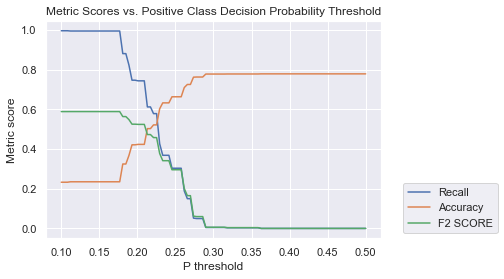

In [596]:
%matplotlib inline
sns.set()
thresh_ps = np.linspace(.10,.50,100)
model_test_probs = rf.predict(X_train_tf) # positive class probs, 

prec_scores, rec_scores, acc_scores, f2_scores = [], [], [], [], 
for p in thresh_ps:
    model_val_labels = model_test_probs >= p
#    prec_scores.append(precision_score(y_test, model_val_labels))
    rec_scores.append(recall_score(y_train_tf, model_val_labels))
    acc_scores.append(accuracy_score(y_train_tf, model_val_labels))
    f2_scores.append(fbeta_score(y_train_tf,model_val_labels,beta = 2))
    
#plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)
plt.plot(thresh_ps, f2_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['Recall','Accuracy','F2 SCORE'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Random Forest Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [501]:
#Encoding of Categorical Variable
df_features = pd.get_dummies(df_eda,columns = cat_features, drop_first = True)
y= df_features["DEFAULT"]
X= df_features.drop(columns = ["DEFAULT","ID"])

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
#Feature Selection


In [504]:
X_train_tf.loc[:,'Age_Pay1'] = X_train_tf['AGE']*X_train_tf['PAY_1']
X_train_tf.loc[:,'Age_Pay2'] = X_train_tf['AGE']*X_train_tf['PAY_2']
X_train_tf.loc[:,'Age_Pay3'] = X_train_tf['AGE']*X_train_tf['PAY_3']
X_train_tf.loc[:,'Age_Pay4'] = X_train_tf['AGE']*X_train_tf['PAY_4']
X_train_tf.loc[:,'Age_Pay5'] = X_train_tf['AGE']*X_train_tf['PAY_5']
X_train_tf.loc[:,'Age_Pay6'] = X_train_tf['AGE']*X_train_tf['PAY_6']
X_train_tf.loc[:,'Age_Gender'] = X_train_tf['AGE']*X_train_tf['SEX_Male']
X_train_tf.loc[:,'Gender_Education_Other'] = X_train_tf['SEX_Male']*X_train_tf['EDUCATION_Other']
X_train_tf.loc[:,'Gender_Education_Univ'] = X_train_tf['SEX_Male']*X_train_tf['EDUCATION_University']
X_train_tf.loc[:,'Gender_Education_HighSchool'] = X_train_tf['SEX_Male']*X_train_tf['EDUCATION_High School']
X_train_tf.loc[:,'Gender_Married_Other'] = X_train_tf['SEX_Male']*X_train_tf['MARRIAGE_Other']
X_train_tf.loc[:,'Gender_Married_Single'] = X_train_tf['SEX_Male']*X_train_tf['MARRIAGE_Single']


/Users/divyauppal/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [505]:
X_test_tf.loc[:,'Age_Pay1'] = X_test_tf['AGE']*X_test_tf['PAY_1']
X_test_tf.loc[:,'Age_Pay2'] = X_test_tf['AGE']*X_test_tf['PAY_2']
X_test_tf.loc[:,'Age_Pay3'] = X_test_tf['AGE']*X_test_tf['PAY_3']
X_test_tf.loc[:,'Age_Pay4'] = X_test_tf['AGE']*X_test_tf['PAY_4']
X_test_tf.loc[:,'Age_Pay5'] = X_test_tf['AGE']*X_test_tf['PAY_5']
X_test_tf.loc[:,'Age_Pay6'] = X_test_tf['AGE']*X_test_tf['PAY_6']
X_test_tf.loc[:,'Age_Gender'] = X_test_tf['AGE']*X_test_tf['SEX_Male']
X_test_tf.loc[:,'Gender_Education_Other'] = X_test_tf['SEX_Male']*X_test_tf['EDUCATION_Other']
X_test_tf.loc[:,'Gender_Education_Univ'] = X_test_tf['SEX_Male']*X_test_tf['EDUCATION_University']
X_test_tf.loc[:,'Gender_Education_HighSchool'] = X_test_tf['SEX_Male']*X_test_tf['EDUCATION_High School']
X_test_tf.loc[:,'Gender_Married_Other'] = X_test_tf['SEX_Male']*X_test_tf['MARRIAGE_Other']
X_test_tf.loc[:,'Gender_Married_Single'] = X_test_tf['SEX_Male']*X_test_tf['MARRIAGE_Single']


In [512]:
pipe = Pipeline([('rfc', RandomForestClassifier(class_weight = 'balanced', n_estimators = 300))])
# create the search grid.
# Pipeline hyper-parameters are specified as <step name>__<hyper-parameter name>
forest_params = [{'rfc__max_depth': list((range(20, 25)))}]
# Instantiate grid-search
grid = GridSearchCV(pipe, forest_params, cv=10, scoring = f2_score, n_jobs = -1, verbose = 1)
# run the grid-search and report results
grid.fit(X_train_tf, y_train)
print(grid.best_params_)
print(grid.score(X_test_tf, y_test))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'rfc__max_depth': 20}
0.42748830456525244


In [516]:
rf = RandomForestRegressor(max_depth = 20, n_estimators = 300,
            random_state=42)
            
# Fit rf to the training set    
rf.fit(X_train_tf, y_train) 


RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

In [519]:
y_predict_rf = (rf.predict(X_test_tf) > .17) 
#print("Threshold of 0.20:")
print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test, y_predict_rf))
print(f"F Beta Score: {fbeta_score(y_test,y_predict_rf,beta = 2)}")
print(f"Accuracy of Random Forest is: {accuracy_score(y_test, y_predict_rf)}")


Random Forest confusion matrix: 

 [[2972 1701]
 [ 366  961]]
F Beta Score: 0.6028858218318696
Accuracy of Random Forest is: 0.6555


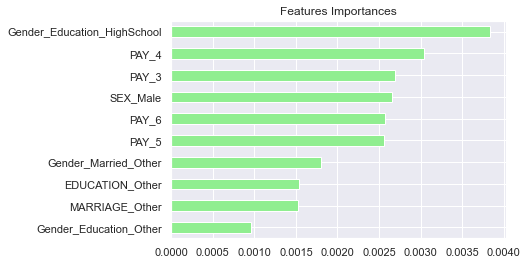

In [520]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train_tf.columns)

# Sort importances
importances_sorted = importances .sort_values()[:10]

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [526]:
df_eda_features = df_features.copy(deep = True)

In [529]:
df_eda_features.drop(columns = ["ID","LIMIT_BAL","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"], inplace = True)

In [531]:
df_eda_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    30000 non-null  int64
 1   PAY_1                  30000 non-null  int64
 2   PAY_2                  30000 non-null  int64
 3   PAY_3                  30000 non-null  int64
 4   PAY_4                  30000 non-null  int64
 5   PAY_5                  30000 non-null  int64
 6   PAY_6                  30000 non-null  int64
 7   DEFAULT                30000 non-null  int64
 8   SEX_Male               30000 non-null  uint8
 9   EDUCATION_High School  30000 non-null  uint8
 10  EDUCATION_Other        30000 non-null  uint8
 11  EDUCATION_University   30000 non-null  uint8
 12  MARRIAGE_Other         30000 non-null  uint8
 13  MARRIAGE_Single        30000 non-null  uint8
dtypes: int64(8), uint8(6)
memory usage: 2.0 MB


In [575]:

y= df_eda_features["DEFAULT"]
X= df_eda_features.drop(columns = ["DEFAULT"])

X_train1,X_test,y_train1,y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train1,y_train1,test_size=0.2, random_state=42)

rf = RandomForestRegressor(max_depth = 20, n_estimators = 300,random_state=42)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 



RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

In [583]:
y_predict_rf_2 = (rf.predict(X_val) > .112) 
print("Threshold of 0.17:")
#print(y_predict_rf)
print("Random Forest confusion matrix: \n\n", confusion_matrix(y_val, y_predict_rf_2))
print(f"F Beta Score: {fbeta_score(y_val,y_predict_rf_2,beta = 2)}")
print(f"Accuracy of Random Forest is: {accuracy_score(y_val, y_predict_rf_2)}")


Threshold of 0.17:
Random Forest confusion matrix: 

 [[1726 1990]
 [ 267  817]]
F Beta Score: 0.5718885622287554
Accuracy of Random Forest is: 0.5297916666666667


Random Forest Model best F2 score 0.572 at prob decision threshold >= 0.112


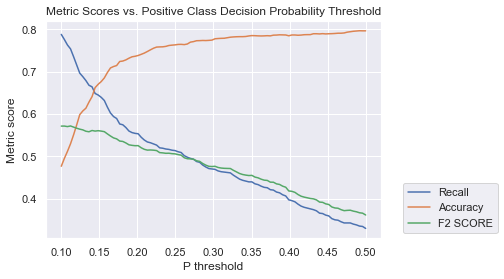

In [579]:
%matplotlib inline
sns.set()
thresh_ps = np.linspace(.10,.50,100)
model_test_probs = rf.predict(X_val) # positive class probs, 

prec_scores, rec_scores, acc_scores, f2_scores = [], [], [], [], 
for p in thresh_ps:
    model_val_labels = model_test_probs >= p
#    prec_scores.append(precision_score(y_test, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    f2_scores.append(fbeta_score(y_val,model_val_labels,beta = 2))
    
#plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)
plt.plot(thresh_ps, f2_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['Recall','Accuracy','F2 SCORE'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Random Forest Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [582]:
y_predict_rf_2 = (rf.predict(X_test) > .112) 
print("Threshold of 0.112:")
#print(y_predict_rf)
print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test, y_predict_rf_2))
print(f"F Beta Score: {fbeta_score(y_test,y_predict_rf_2,beta = 2)}")
print(f"Accuracy of Random Forest is: {accuracy_score(y_test, y_predict_rf_2)}")


Threshold of 0.112:
Random Forest confusion matrix: 

 [[2206 2467]
 [ 334  993]]
F Beta Score: 0.5662636861313868
Accuracy of Random Forest is: 0.5331666666666667
